In [8]:
import tensorflow as tf #all neural networks will be present in this tensorflow

In [9]:
print(tf.__version__)

2.16.2


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
import pandas as pd

file_path = '/Users/yashwanth_kalyan_/Desktop/Churn_Modelling.csv'
df = pd.read_csv(file_path)
print(df.head())


   apst  CustomerId   Surname  CreditScore  Geography  Gender  Age  Tenure  \
0     1    15634602  Hargrave          619      delhi  Female   42       2   
1     2    15647311      Hill          608  bangalore  Female   41       1   
2     3    15619304      Onio          502      delhi  Female   42       8   
3     4    15701354      Boni          699      delhi  Female   39       1   
4     5    15737888  Mitchell          850  bangalore  Female   43       2   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              1          1               1        101348.88   
1   83807.86              1          0               1        112542.58   
2  159660.80              3          1               0        113931.57   
3       0.00              2          0               0         93826.63   
4  125510.82              1          1               1         79084.10   

   Exited  
0       1  
1       0  
2       1  
3       0  
4       0  


In [ ]:
# Now we will be doing the churn Predcition ,Example: Like For the first season i took netflix Subscription,so the company will give offer for the renewing the service.

In [ ]:
#Churn Prediction is very important

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   apst             10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [16]:
df.isnull().sum()  #1st problem is resolved all null values are removed

apst               0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
#2nd problem that we should resolve 

In [29]:
df.head()

,apst,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,delhi,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,bangalore,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,delhi,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,delhi,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,bangalore,Female,43,2,125510.82,1,1,1,79084.10,0


In [20]:
#Exited is the column That we are going to predict-That's Exited here
# Here we no need of First 3 Columns
#From CreditScore to EstimatedSalary Everything is important for estimating exited
#Geography and Gender Should are in non-numerical data so we should Conver them into the numerical data
# In gender we have data with the two with that help form male/female with one information Notmale/male we can predict the data of others.

In [31]:
x=df.iloc[:,3:13]

In [33]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
dtypes: float64(2), int64(6), object(2)
memory usage: 781.4+ KB


In [35]:
# Create dummy variables
geography = pd.get_dummies(x["Geography"], drop_first=True)
gender = pd.get_dummies(x["Gender"], drop_first=True)

# Concatenate dummy variables with the original dataset (after dropping original categorical columns)
x = pd.concat([x.drop(['Geography', 'Gender'], axis=1), geography, gender], axis=1)


In [36]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Age              10000 non-null  int64  
 2   Tenure           10000 non-null  int64  
 3   Balance          10000 non-null  float64
 4   NumOfProducts    10000 non-null  int64  
 5   HasCrCard        10000 non-null  int64  
 6   IsActiveMember   10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   delhi            10000 non-null  bool   
 9   mumbai           10000 non-null  bool   
 10  Male             10000 non-null  bool   
dtypes: bool(3), float64(2), int64(6)
memory usage: 654.4 KB


In [37]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,delhi,mumbai,Male
0,619,42,2,0.00,1,1,1,101348.88,True,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,False
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,True
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,True


In [39]:
# Convert boolean columns to integers (True -> 1, False -> 0)
x['delhi'] = x['delhi'].astype(int)
x['mumbai'] = x['mumbai'].astype(int)
x['Male'] = x['Male'].astype(int)


In [40]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,delhi,mumbai,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,1


In [ ]:
#Now Data is perfect for modelling there is no missing values or There is No non-numerical values so the data

In [ ]:
#For Any project There Should be no data is missing,no data is Non-numerical(the data should be in numerical form)

In [46]:
y = df['Exited']

In [50]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [49]:
!pip install scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 3.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 2.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]


In [51]:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)


In [53]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 6252 to 6929
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      2000 non-null   int64  
 1   Age              2000 non-null   int64  
 2   Tenure           2000 non-null   int64  
 3   Balance          2000 non-null   float64
 4   NumOfProducts    2000 non-null   int64  
 5   HasCrCard        2000 non-null   int64  
 6   IsActiveMember   2000 non-null   int64  
 7   EstimatedSalary  2000 non-null   float64
 8   delhi            2000 non-null   int64  
 9   mumbai           2000 non-null   int64  
 10  Male             2000 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 187.5 KB


In [54]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 9254 to 7270
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      8000 non-null   int64  
 1   Age              8000 non-null   int64  
 2   Tenure           8000 non-null   int64  
 3   Balance          8000 non-null   float64
 4   NumOfProducts    8000 non-null   int64  
 5   HasCrCard        8000 non-null   int64  
 6   IsActiveMember   8000 non-null   int64  
 7   EstimatedSalary  8000 non-null   float64
 8   delhi            8000 non-null   int64  
 9   mumbai           8000 non-null   int64  
 10  Male             8000 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 750.0 KB


In [55]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 8000 entries, 9254 to 7270
Series name: Exited
Non-Null Count  Dtype
--------------  -----
8000 non-null   int64
dtypes: int64(1)
memory usage: 125.0 KB


In [56]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 2000 entries, 6252 to 6929
Series name: Exited
Non-Null Count  Dtype
--------------  -----
2000 non-null   int64
dtypes: int64(1)
memory usage: 31.2 KB


In [ ]:
# IF we observe Carefully we can see that x will 8000 will train data and 2000 will have  the testing data 
#No data is completely Trained or tested because to avoid Overfitting bias


In [57]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [58]:
x_train

array([[ 0.35649971, -0.6557859 ,  0.34567966, ...,  1.00150113,
        -0.57946723,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ..., -0.99850112,
         1.72572313,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.99850112,
        -0.57946723,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ...,  1.00150113,
        -0.57946723, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ...,  1.00150113,
        -0.57946723,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ..., -0.99850112,
         1.72572313,  0.91324755]])

In [ ]:
#PART 2 We have 

#part1 
#We have cleaned the data
#no null values
#all columns are numerical


In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU
from tensorflow.keras.layers import ELU, Dropout


In [62]:
classifier = Sequential()


In [63]:
classifier.add(Dense(units=11, activation='relu'))

In [64]:
classifier.add(Dense(units=5, activation='relu'))

In [70]:
classifier.add(Dense(units=1, activation='relu'))

In [74]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [75]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)


x_train shape: (8000, 11)
y_train shape: (8000,)


In [76]:
classifier = Sequential()
classifier.add(Dense(units=11, activation='relu', input_shape=(11,)))
classifier.add(Dense(units=5, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))  # for binary classification
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [79]:
model_history = classifier.fit(x_train, y_train, validation_split=0.33, batch_size=1000, epochs=50)


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7952 - loss: 0.4710 - val_accuracy: 0.7967 - val_loss: 0.4719
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7962 - loss: 0.4651 - val_accuracy: 0.7982 - val_loss: 0.4697
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7971 - loss: 0.4673 - val_accuracy: 0.7978 - val_loss: 0.4676
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7948 - loss: 0.4682 - val_accuracy: 0.7986 - val_loss: 0.4655
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7987 - loss: 0.4582 - val_accuracy: 0.7989 - val_loss: 0.4638
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8032 - loss: 0.4520 - val_accuracy: 0.8001 - val_loss: 0.4621
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7972 - loss: 0.4550 - val_accuracy: 0.8008 - val_loss: 0.4605
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8032 - loss: 0.4506 - val_accuracy: 0.8023 - val_loss: 0.4590
Epoch 9/

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


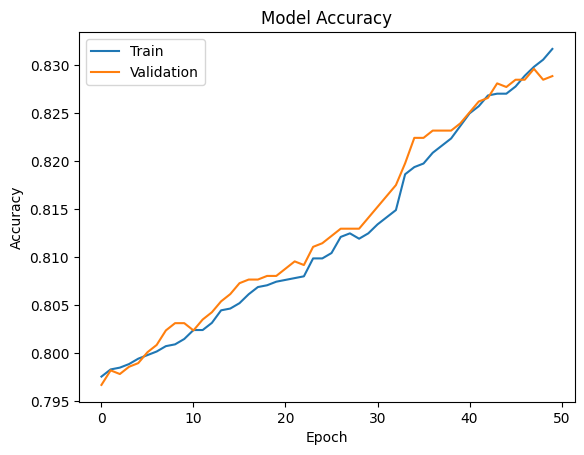

In [80]:

print(model_history.history.keys())


import matplotlib.pyplot as plt

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [81]:
# we can clearly see The loss is decareasing and Accuraccy is increasing
